# Plotting on data-aware grids

http://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html

* Draw multiple instances of the same plot on different subsets of data
* lattice
* trellis
* Use 'tidy' data
  * each colum = variable
  * each row = observation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

/Users/bartev/.virtualenvs/aost/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
sns.set(style = 'ticks')
np.random.seed(sum(map(ord, 'axis_grids')))

# Subsetting data with `FacetGrid`

* Use `FacetGrid` class when you want to visualize the distribution of a 
  variable or the relationship between multiple variables separately 
  within subsets of your dataset
* Can be draws with up to 3 dimensions:
  * row
  * column
  * hue (think of as 3rd dim along a depth axis, use colors to distinguish)

* Initialize an object with
  * dataframe 
  * names of the vars that will for the row, column or hue dimensions
    * should be categorical or discrete
* each level will be used for a facet along that axis

* `lmplot()` and `factorplot()` use `FacetGrid` internally
* both return the `FacetGrid` object so it can be used for further tweaking

In [3]:
tips = sns.load_dataset('tips')

#### Set up the matplotlib figure and axes, but don't draw anything on them

/Users/bartev/.virtualenvs/aost/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


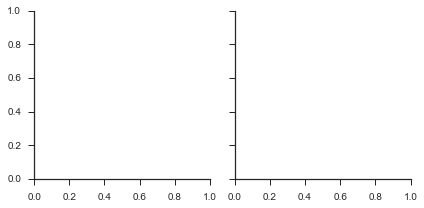

In [4]:
g = sns.FacetGrid(tips, col = 'time')

In [5]:
type(g)

seaborn.axisgrid.FacetGrid

#### `FacetGrid.map()` - main approach for visualizing data on this grid

give it 
* a plotting function
* name(s) of variable(s) in teh dataframe to plot

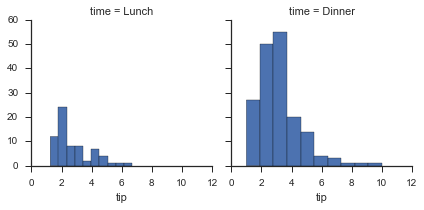

In [6]:
g = sns.FacetGrid(tips, col = 'time')
g.map(plt.hist, 'tip')

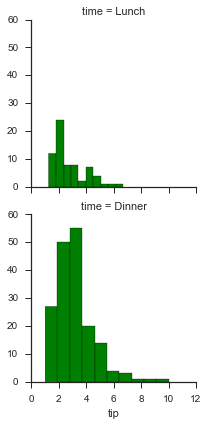

In [7]:
g = sns.FacetGrid(tips, row = 'time')
g.map(plt.hist, 'tip', color = 'g')

* To make relational plot, pass multiple variable names
* accepts keyword arguments

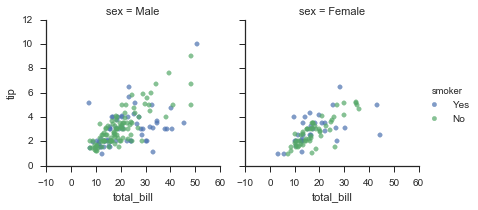

In [8]:
g = sns.FacetGrid(tips, col = 'sex', hue = 'smoker')
g.map(plt.scatter, 'total_bill', 'tip', alpha = 0.7)
g.add_legend()

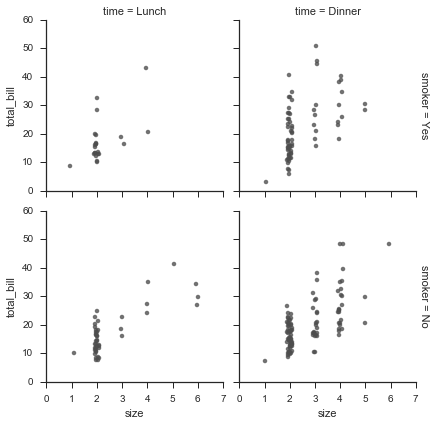

In [9]:
g = sns.FacetGrid(tips,
                  row = 'smoker',
                  col = 'time',
                  margin_titles = True)
g.map(sns.regplot,
      'size',
      'total_bill',
      color = '0.3',
      fit_reg = False,
      x_jitter = 0.1)

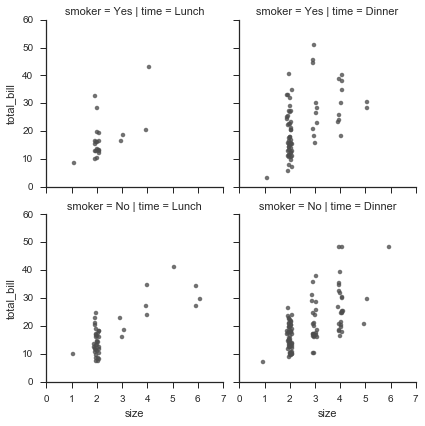

In [10]:
g = sns.FacetGrid(tips,
                  row = 'smoker',
                  col = 'time',
                  margin_titles = False)
g.map(sns.regplot,
      'size',
      'total_bill',
      color = '0.3',
      fit_reg = False,
      x_jitter = 0.1)

Size of the figure is set by providing the height of **each facet**
along with the aspect ratio

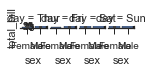

In [11]:
g = sns.FacetGrid(tips, col = 'day', size = 1, aspect = 0.5)
g.map(sns.barplot, 'sex', 'total_bill')

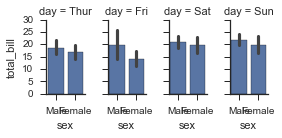

In [12]:
g = sns.FacetGrid(tips, col = 'day', size = 2, aspect = 0.5)
g.map(sns.barplot, 'sex', 'total_bill')

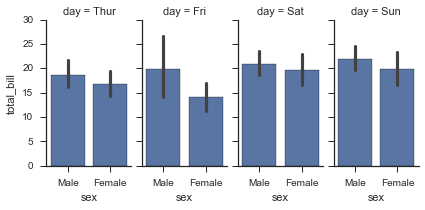

In [13]:
g = sns.FacetGrid(tips, col = 'day', size = 3, aspect = 0.5)
g.map(sns.barplot, 'sex', 'total_bill')

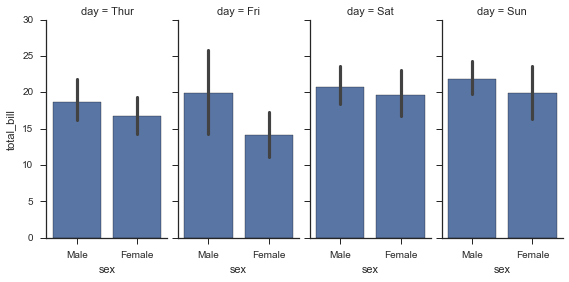

In [14]:
g = sns.FacetGrid(tips, col = 'day', size = 4, aspect = 0.5)
g.map(sns.barplot, 'sex', 'total_bill')

#### Pass parameters to be used in the `gridspec` module

/Users/bartev/.virtualenvs/aost/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


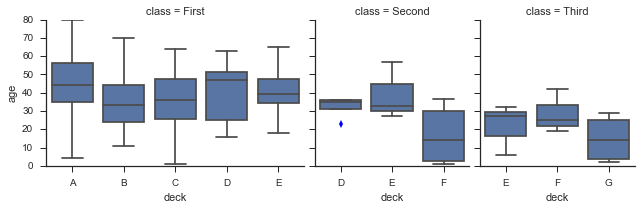

In [15]:
titanic = sns.load_dataset('titanic');
titanic = titanic.assign(
    deck = titanic.deck.astype(object)).sort('deck');
g = sns.FacetGrid(titanic, 
                  col = 'class',
                  sharex = False,
                  gridspec_kws = {'width_ratios': [5, 3, 3]});
g.map(sns.boxplot, 'deck', 'age');

#### Change ordering of facets

Default ordering derived from DataFrame
* if facet variable is categorical, then order of the categories is used
* otherwise, facets ordered in order of appearence of the cat levels
* Can specify ordering of any facet dimension with `*_order` param

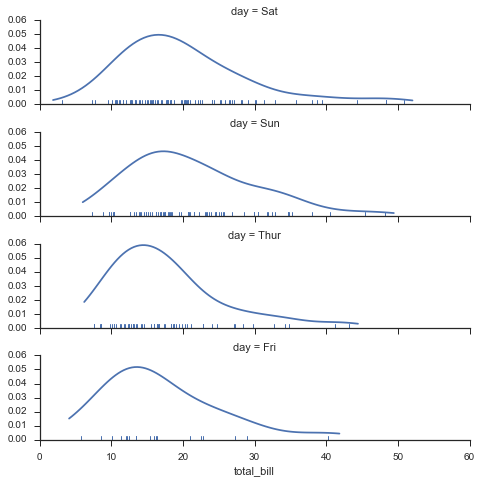

In [16]:
ordered_days = tips.day.value_counts().index
g = sns.FacetGrid(tips,
                  row = 'day',
                  row_order = ordered_days,
                  size = 1.7,
                  aspect = 4)
g.map(sns.distplot, 'total_bill', hist = False, rug = True);

Provide a list for row order

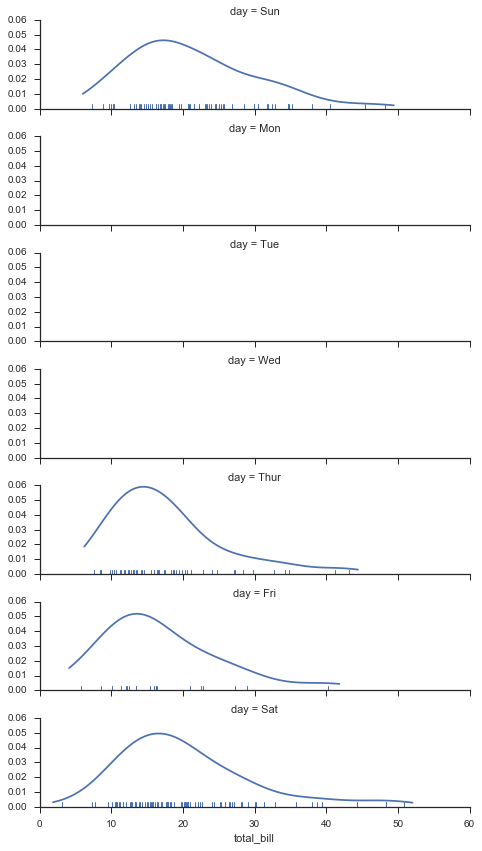

In [17]:
ordered_days = ['Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat']
g = sns.FacetGrid(tips,
                  row = 'day',
                  row_order = ordered_days,
                  size = 1.7,
                  aspect = 4)
g.map(sns.distplot, 'total_bill', hist = False, rug = True);

#### Use a seaborn palette OR a dictionary to map `hue` variable
to matplotlib colors

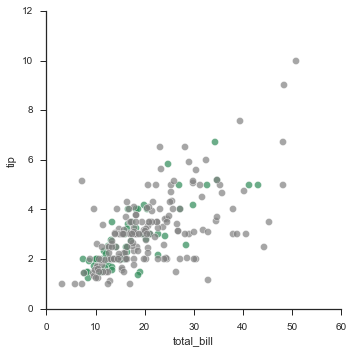

In [18]:
pal = dict(Lunch = 'seagreen', Dinner = 'gray')
g = sns.FacetGrid(tips, hue = 'time', palette = pal, size = 5)
g.map(plt.scatter, 'total_bill', 'tip', s = 50, alpha = 0.7, 
      linewidth = 0.5, edgecolor = 'white')

#### Vary other aspects across levels of the `hue` variable

* pass a dictionary to `hue_kws` where 
  * keys are names of plotting function keyword arguments
  * values are list of keyword values, 1 for each level of the var

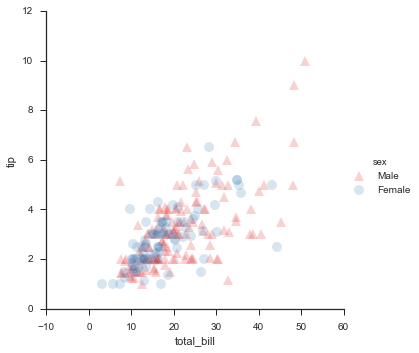

In [19]:
g = sns.FacetGrid(tips,
                  hue = 'sex',
                  palette = 'Set1',
                  size = 5,
                  hue_kws = {'marker' : ['^', 'o']})
g.map(plt.scatter,
      'total_bill',
      'tip',
      s = 100,
      alpha = 0.2,
      linewidth = 0.5,
      edgecolor = 'white')
g.add_legend()

### `facet_wrap` equivalent

* Plot levels of one variable along columns, but wrap them
  so they span sevral rows

In [21]:
attend = sns.load_dataset('attention').query('subject <= 12')

ImportError: 'numexpr' not found. Cannot use engine='numexpr' for query/eval if 'numexpr' is not installed

In [22]:
attend.head()

NameError: name 'attend' is not defined

In [ ]:
g = sns.FacetGrid(attend,
                  col = 'subject',
                  col_wrap = 4,
                  size = 2,
                  ylim = (0, 10))

In [ ]:
g = sns.FacetGrid(attend,
                  col = 'subject',
                  col_wrap = 4,
                  size = 2,
                  ylim = (0, 10))
g.map(sns.pointplot, 'solutions', 'score', color = '0.3', ci = None)

In [ ]:
g = sns.FacetGrid(attend,
                  col = 'subject',
                  col_wrap = 4,
                  size = 2,
                  ylim = (0, 10))
g.map(sns.pointplot, 'solutions', 'score',
                  color = 'r', ci = None)

### Adjust other aspects of the plot (labels, ticks, etc)

In [ ]:
with sns.axes_style('white'):
    g = sns.FacetGrid(tips, 
                      row = 'sex', 
                      col = 'smoker',
                      margin_titles = True,
                      size = 2.5)
g.map(plt.scatter, 'total_bill', 'tip', 
      color = '#334488', edgecolor = 'white', lw = 0.5);
g.set_axis_labels('Total bill (US Dollars)', 'Tip');
g.set(xticks = [10, 30, 50], yticks = [2, 6, 10]);
g.fig.subplots_adjust(wspace = 0.02, hspace = 0.02);

For further customization
* Use `Figure` and `Axes` objects
* stored as member attributes at `fig` and `axes` (a 2-D array)

In [ ]:
g = sns.FacetGrid(tips, col = 'smoker', margin_titles = True, size = 4)
g.map(plt.scatter,
      'total_bill',
      'tip',
      color = '#338844',
      edgecolor = 'white',
      s = 50,
      lw = 1)
for ax in g.axes.flat:
    ax.plot((0, 50), (0, 0.2 * 50), c = 'r', ls = '--')
g.set(xlim = (0, 60), ylim = (0, 14))

## Mapping custom functions onto the grid

* Must plot onto the currently active matplotlib `Axes`
  * can call `plt.gca` to get a reference to the current `Axes`
* must acespt the data that it plots in positional arguments
  * `FacetGrid` will pass a `Series` of data for each named positional
    arguments
* must be able to accept `color` and `label` keyword arguments

In [ ]:
def quantile_plot(x, **kwargs):
    qntls, xr = stats.probplot(x, fit = False)
    plt.scatter(xr, qntls, **kwargs)

g = sns.FacetGrid(tips, col = 'sex', size = 4)
g.map(quantile_plot, 'total_bill')

To make a bivariate plot, 
* write the function so it accepts x-axis var first, 
  and the y-axis var second

In [ ]:
def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit = False)
    _, yr = stats.probplot(y, fit = False)
    plt.scatter(xr, yr, **kwargs)

g = sns.FacetGrid(tips, col = 'smoker', size = 4)
g.map(qqplot, 'total_bill', 'tip')

`plt.scatter` accepts `color` and `label` keywords, so we can
easily add a `hue` facet 

In [ ]:
g = sns.FacetGrid(tips, hue = 'time', col = 'sex', size = 4)
g.map(qqplot, 'total_bill', 'tip')
g.add_legend();

This approach also lets us use additional aesthetics to 
distinguish the levels of the hue variable, along with 
keyword arguments that won’t be depdendent on the faceting variables:

In [ ]:
g = sns.FacetGrid(tips,
                  hue = 'time',
                  col = 'sex',
                  size = 4,
                  hue_kws = {'marker' : ['s', 'D']})
g.map(qqplot, 'total_bill', 'tip', s = 40, edgecolor = 'w')
g.add_legend();

Ordinarily, `plt.hexbin` does not play well with `FacetGrid`

In [ ]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap = True)
    plt.hexbin(x, y, gridsize = 15, cmap = cmap, **kwargs)

with sns.axes_style('dark'):
    g = sns.FacetGrid(tips, hue = 'time', col = 'time', size = 4)
g.map(hexbin, 'total_bill', 'tip', extent = [0, 50, 0, 10]);

# Plotting pairwise relationships with `PairGrid` 
and `pairplot()`

### Scatterplot Matrix

* `PairGrid` allows you to quickly draw a grid of small subplots using 
  the same plot type
* In a `PairGrid`, each row and column is assigned to a different variable
* Result is a plot showing each pairwise relationship in the dataset

* `FacetGrid` - each facet shows the same relationship conditioned on 
  different levels of other variables
* `PairGrid` - each plot shows a different relationship 
  * Upper and lower triangles have mirrored plots
  * Useful for quick, high-level summary of dataset relationship

1. Initialize the grid
2. Pass a plotting function to a `map` method to be called on 
   each subplot 

* Companion function - `pairplot()`
  * trade off flexibility for faster plotting

In [ ]:
iris = sns.load_dataset('iris')
g = sns.PairGrid(iris)
g.map(plt.scatter);

### Plot a different function on the diagonal to show the 
univariate distribution of the variable in each column

In [ ]:
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

Color observations by a separate categorical variable

In [ ]:
g = sns.PairGrid(iris, hue = 'species')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

### Limit to particular relationships

In [ ]:
g = sns.PairGrid(iris,
                 vars = ['sepal_length', 'sepal_width'],
                 hue = 'species')
g.map(plt.scatter);

### Use a different function in upper and lower triangles

In [ ]:
g = sns.PairGrid(iris)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap = 'Blues_d')
g.map_diag(sns.kdeplot, lw = 3, legend = False);

## Plot different variables in rows and columns

### Scatterplot is a special case

In [ ]:
g = sns.PairGrid(tips,
                 y_vars = ['tip'],
                 x_vars = ['total_bill', 'size'],
                 size = 4)
g.map(sns.regplot, color = '0.3')
g.set(ylim = (-1, 11), yticks = [0, 5, 10]);                

### Configure aesthetics attributes

In [ ]:
g = sns.PairGrid(tips,
                 hue = 'size',
                 palette = 'GnBu_d')
g.map(plt.scatter, s = 50, edgecolor = 'white')
g.add_legend();

## Use `pairplot()` for a quick look at dataset

* May be easier than `PairGrid`
* uses scatterplots and histograms by default
* returns `PairGrid` instance for further tweaking

In [ ]:
sns.pairplot(iris, hue = 'species', size = 2.5);

In [ ]:
sns.pairplot(iris, 
             hue = 'species', 
             palette = 'Set2', 
             diag_kind = 'kde', 
             size = 2.);